# Heart Failure Prediction with Neural Nets(ANN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
print('Train Data shape=',df.shape)

Train Data shape= (299, 13)


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

# Statistical View

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df.DEATH_EVENT.unique()

array([1, 0], dtype=int64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Visualization

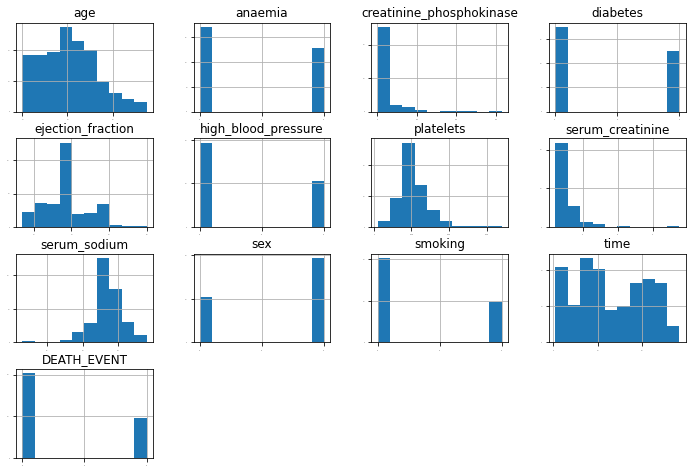

In [9]:
df.hist(xlabelsize=1,ylabelsize=1,figsize=(12,8))
plt.show()

In [10]:
cols_to_scale = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [11]:
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
187,0.363636,0,0.238964,1,0.166667,0,0.412050,0.179775,0.885714,0,0,0.597865,1
107,0.090909,1,0.236412,1,0.318182,0,0.243545,0.044944,0.714286,1,0,0.298932,0
99,0.418182,1,0.004848,1,0.393939,0,0.237483,0.067416,0.771429,0,0,0.291815,0
122,0.363636,0,0.009314,1,0.363636,0,0.245969,0.028090,0.771429,0,0,0.323843,0
41,0.181818,0,0.012886,1,0.242424,1,0.155049,0.078652,0.657143,0,1,0.099644,1


In [12]:
x = df.drop("DEATH_EVENT", axis = "columns")
y = df["DEATH_EVENT"]

In [13]:
x.shape

(299, 12)

In [14]:
y.shape

(299,)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=5)

In [16]:
x_train.shape

(209, 12)

In [17]:
y_train.shape

(209,)

In [45]:
#from keras.models import Sequential

model = keras.Sequential([keras.layers.Dense(12, input_shape = (12,), activation = "relu"),
                          keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer="adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 300)

Epoch 1/300
7/7 [==============================] - 0s 714us/step - loss: 0.7644 - accuracy: 0.3158
Epoch 2/300
7/7 [==============================] - 0s 571us/step - loss: 0.7445 - accuracy: 0.2919
Epoch 3/300
7/7 [==============================] - 0s 714us/step - loss: 0.7279 - accuracy: 0.3014
Epoch 4/300
7/7 [==============================] - 0s 856us/step - loss: 0.7139 - accuracy: 0.4115
Epoch 5/300
7/7 [==============================] - 0s 857us/step - loss: 0.7015 - accuracy: 0.4737
Epoch 6/300
7/7 [==============================] - 0s 714us/step - loss: 0.6925 - accuracy: 0.5646
Epoch 7/300
7/7 [==============================] - 0s 715us/step - loss: 0.6830 - accuracy: 0.6077
Epoch 8/300
7/7 [==============================] - 0s 857us/step - loss: 0.6776 - accuracy: 0.6316
Epoch 9/300
7/7 [==============================] - 0s 714us/step - loss: 0.6713 - accuracy: 0.6555
Epoch 10/300
7/7 [==============================] - 0s 857us/step - loss: 0.6658 - accuracy: 0.6507
Epoch 11/

7/7 [==============================] - 0s 714us/step - loss: 0.5373 - accuracy: 0.7177
Epoch 84/300
7/7 [==============================] - 0s 714us/step - loss: 0.5352 - accuracy: 0.7225
Epoch 85/300
7/7 [==============================] - 0s 857us/step - loss: 0.5330 - accuracy: 0.7225
Epoch 86/300
7/7 [==============================] - 0s 571us/step - loss: 0.5308 - accuracy: 0.7273
Epoch 87/300
7/7 [==============================] - 0s 714us/step - loss: 0.5287 - accuracy: 0.7273
Epoch 88/300
7/7 [==============================] - 0s 714us/step - loss: 0.5267 - accuracy: 0.7273
Epoch 89/300
7/7 [==============================] - 0s 859us/step - loss: 0.5243 - accuracy: 0.7273
Epoch 90/300
7/7 [==============================] - 0s 571us/step - loss: 0.5223 - accuracy: 0.7321
Epoch 91/300
7/7 [==============================] - 0s 572us/step - loss: 0.5201 - accuracy: 0.7368
Epoch 92/300
7/7 [==============================] - 0s 571us/step - loss: 0.5181 - accuracy: 0.7464
Epoch 93/300


7/7 [==============================] - 0s 571us/step - loss: 0.4044 - accuracy: 0.8325
Epoch 165/300
7/7 [==============================] - 0s 714us/step - loss: 0.4035 - accuracy: 0.8325
Epoch 166/300
7/7 [==============================] - 0s 571us/step - loss: 0.4022 - accuracy: 0.8278
Epoch 167/300
7/7 [==============================] - 0s 714us/step - loss: 0.4016 - accuracy: 0.8325
Epoch 168/300
7/7 [==============================] - 0s 571us/step - loss: 0.4009 - accuracy: 0.8325
Epoch 169/300
7/7 [==============================] - 0s 714us/step - loss: 0.4000 - accuracy: 0.8325
Epoch 170/300
7/7 [==============================] - 0s 714us/step - loss: 0.3991 - accuracy: 0.8325
Epoch 171/300
7/7 [==============================] - 0s 571us/step - loss: 0.3984 - accuracy: 0.8325
Epoch 172/300
7/7 [==============================] - 0s 572us/step - loss: 0.3973 - accuracy: 0.8325
Epoch 173/300
7/7 [==============================] - 0s 714us/step - loss: 0.3969 - accuracy: 0.8373
Epoc

7/7 [==============================] - 0s 713us/step - loss: 0.3610 - accuracy: 0.8612
Epoch 246/300
7/7 [==============================] - 0s 1000us/step - loss: 0.3606 - accuracy: 0.8612
Epoch 247/300
7/7 [==============================] - 0s 714us/step - loss: 0.3605 - accuracy: 0.8612
Epoch 248/300
7/7 [==============================] - 0s 857us/step - loss: 0.3600 - accuracy: 0.8612
Epoch 249/300
7/7 [==============================] - 0s 714us/step - loss: 0.3596 - accuracy: 0.8565
Epoch 250/300
7/7 [==============================] - 0s 714us/step - loss: 0.3596 - accuracy: 0.8565
Epoch 251/300
7/7 [==============================] - 0s 571us/step - loss: 0.3598 - accuracy: 0.8565
Epoch 252/300
7/7 [==============================] - 0s 714us/step - loss: 0.3591 - accuracy: 0.8565
Epoch 253/300
7/7 [==============================] - 0s 856us/step - loss: 0.3586 - accuracy: 0.8565
Epoch 254/300
7/7 [==============================] - 0s 857us/step - loss: 0.3585 - accuracy: 0.8565
Epo

In [46]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 0s/step - loss: 0.4191 - accuracy: 0.8000


[0.41909849643707275, 0.800000011920929]

In [48]:
pred = model.predict(x_test)
pred[:5]

array([[0.11947551],
       [0.44358733],
       [0.91358125],
       [0.7634328 ],
       [0.03306946]], dtype=float32)

In [49]:
y_test[:5]

198    0
66     1
24     1
102    0
264    0
Name: DEATH_EVENT, dtype: int64

In [54]:
y_pred = []
for element in pred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [55]:
y_pred[:5]

[0, 0, 1, 1, 0]